In [10]:
import os
import pandas as pd
import numpy as np
import json
import datetime as dt
from matplotlib import pyplot as plt

#plt.style.use('seaborn-deep')
%matplotlib inline

In [11]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\leaderboard'
#folder = r'C:\Users\sdbrown\OneDrive - LMI\Desktop'
file = r'1524967.json'

f = open(os.path.join(folder,file))
data = json.load(f)
f.close()

In [12]:
df = pd.DataFrame()

for m in data['members'].keys():
    name = data['members'][m]['name']
    name = m if name is None else name
    print(name)
    times = {'member':name, 'score':int(data['members'][m]['local_score']), 'stars': int(data['members'][m]['stars'])}
    for day in data['members'][m]['completion_day_level'].keys():
        for p in data['members'][m]['completion_day_level'][day].keys():
            times[day + '_' + p + '_time'] = dt.datetime.fromtimestamp(data['members'][m]['completion_day_level'][day][p]['get_star_ts'])
            
    df = df.append(times,ignore_index=True)
    

for col in df.columns:
    if col in ['score','stars']:
        df[col] = df[col].astype(int)
    elif col == 'member':
        pass
    else:
        problem = col.replace('time','rank') 
        df[problem] = df[col].rank()
        
df.sort_values(by='member',inplace=True)
df.reset_index(inplace=True)

complexityOfDharma
David G
Stephanie Brown
Jessica Moore
cwithrow
Julia Buffinton
Jessica Conroy
1696091
Simon Whittle
Cindy Goss


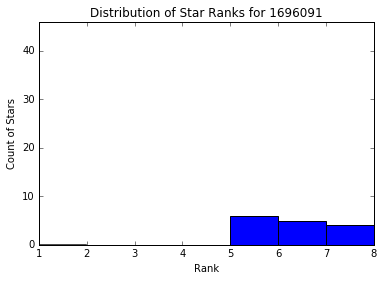

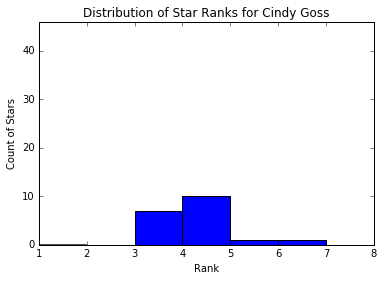

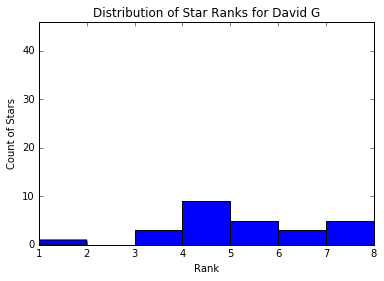

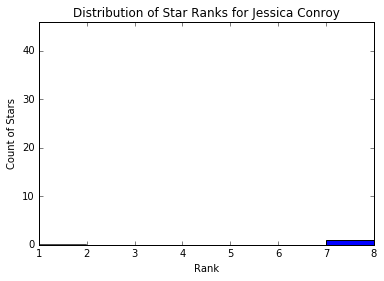

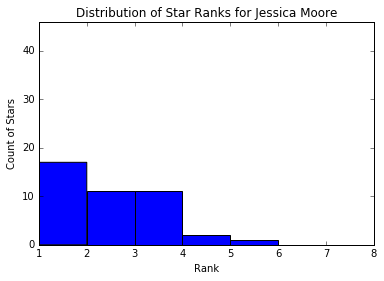

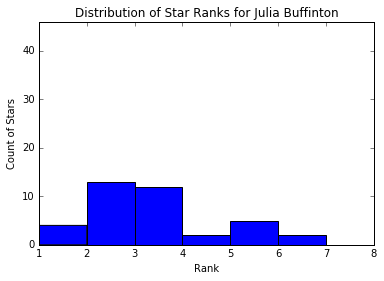

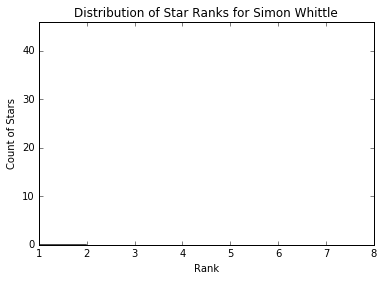

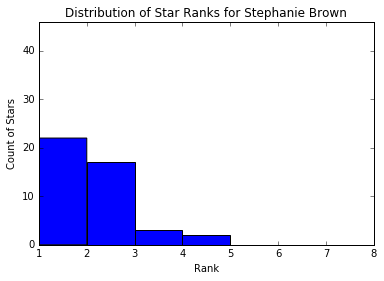

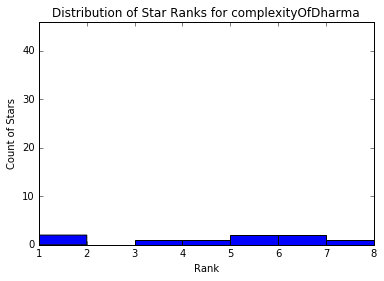

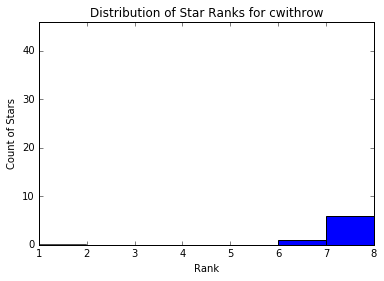

In [13]:
ranks = df.loc[:,(df.columns.str.contains('rank'))]
ranks = ranks.fillna(-1)

for idx,row in ranks.iterrows():
    plt.hist(row,bins=[1,2,3,4,5,6,7,8])
    plt.title('Distribution of Star Ranks for {m}'.format(m=df.loc[idx,'member']))
    plt.xlabel('Rank')
    plt.ylabel('Count of Stars')
    plt.ylim(0,len(row))
    plt.show()



In [14]:
def getScoreByDay(row,num_ppl,num_days):
    # for a single member, get what their score was at the end of each day
    
    scores = [0]
    
    for d in range(num_days):
        time_cutoff = dt.datetime(2021,12,d+2)
        times = row[row.index.str.contains('time')]
        ranks = row[row.index.str.contains('rank')]
        score = num_ppl - ranks[(times < time_cutoff).values]+1
        scores.append(int(score.sum()))
     
    return scores

In [15]:
scores = pd.DataFrame()
day = min(dt.datetime.utcnow().day,25)

for idx, row in df.iterrows():
    scores[row.member] =  getScoreByDay(row,len(df.member),day)

scores

,1696091,Cindy Goss,David G,Jessica Conroy,Jessica Moore,Julia Buffinton,Simon Whittle,Stephanie Brown,complexityOfDharma,cwithrow
0,0,0,0,0,0,0,0,0,0,0
1,8,16,14,0,20,11,0,18,11,0
2,14,30,14,0,38,22,0,34,31,0
3,24,45,14,0,56,35,0,54,45,0
4,29,61,14,0,76,53,0,68,45,0
5,53,77,14,0,90,71,0,88,45,0
6,63,82,27,0,110,87,0,106,52,10
7,72,95,57,0,130,103,0,124,61,27
8,72,102,79,0,145,119,0,143,61,27
9,72,109,79,0,163,137,0,161,61,27


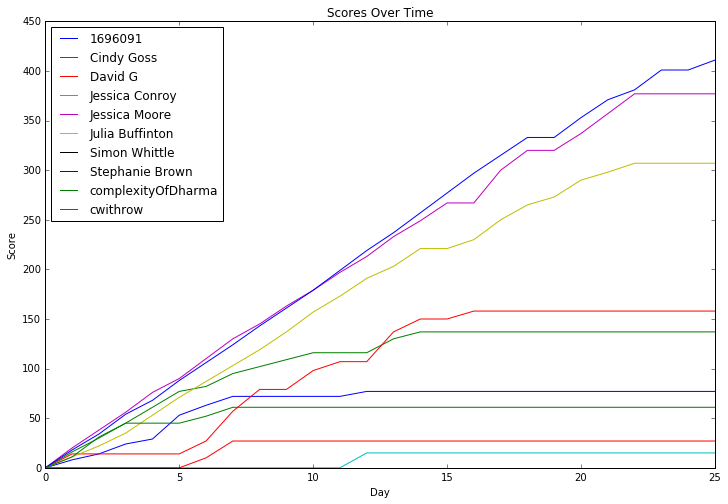

In [16]:
plt.figure(figsize=(12,8))
for member in scores.columns:
    plt.plot(scores[member],label=member)
    
plt.legend(loc='upper left')
plt.title('Scores Over Time')
plt.xlabel('Day')
plt.ylabel('Score')
plt.show()

In [9]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\leaderboard'
file = r'stats.xlsx'

df.to_excel(os.path.join(folder,file))

In [8]:
df[['member','19_1_time','19_2_time']]

,member,19_1_time,19_2_time
0,1696091,NaN,NaN
1,Cindy Goss,NaN,NaN
2,David G,NaN,NaN
3,Jessica Conroy,NaN,NaN
4,Jessica Moore,2021-12-22 22:25:47,2021-12-22 22:32:17
5,Julia Buffinton,NaN,NaN
6,Simon Whittle,NaN,NaN
7,Stephanie Brown,NaN,NaN
8,complexityOfDharma,NaN,NaN
9,cwithrow,NaN,NaN
